In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
brute = np.load("bruteforce_results.npz")
qaoa = np.load("qaoa_results.npz")
cvxpy = np.load("cvxpy_results.npz")

In [3]:
fx_BF = brute["fx_bruteforce"].item()
mu_ann_BF = brute["mu_ann_bruteforce"].item()
std_ann_BF = brute["std_ann_bruteforce"].item()
sharpe_BF = brute["sharpe_bruteforce"].item()

fx_QAOA = qaoa["fx_qaoa"].item()
mu_ann_QAOA = qaoa["mu_ann_qaoa"].item()
std_ann_QAOA = qaoa["std_ann_qaoa"].item()
sharpe_QAOA = qaoa["sharpe_qaoa"].item()

fx_CVX = cvxpy["fx_cvxpy"].item()
mu_ann_CVX = cvxpy["mu_ann_cvxpy"].item()
std_ann_CVX = cvxpy["std_ann_cvxpy"].item()
sharpe_CVX = cvxpy["sharpe_cvxpy"].item()

In [4]:
print("\n[Comparison]")
print(f"Brute-Force optimum  f(x) = {fx_BF:.6f},  Sharpe = {sharpe_BF:.3f}")
print(f"QAOA result           f(x) = {fx_QAOA:.6f},  Sharpe = {sharpe_QAOA:.3f}")
print(f"Classical (CVXPy)     f(x) = {fx_CVX:.6f},  Sharpe = {sharpe_CVX:.3f}")


[Comparison]
Brute-Force optimum  f(x) = -0.001198,  Sharpe = 2.548
QAOA result           f(x) = -0.000915,  Sharpe = 2.168
Classical (CVXPy)     f(x) = -0.001198,  Sharpe = 2.548


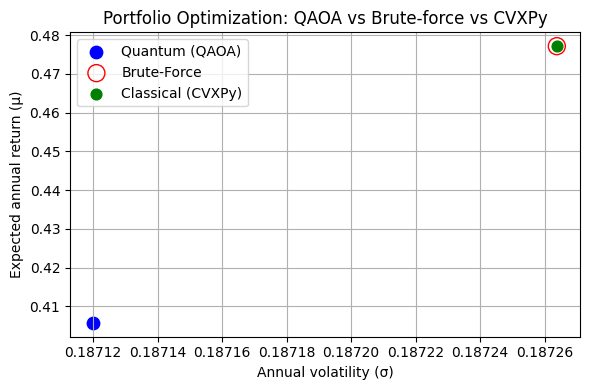

In [6]:
plt.figure(figsize=(6, 4))

plt.scatter(std_ann_QAOA, mu_ann_QAOA, color='blue', label='Quantum (QAOA)', s=80)

plt.scatter(std_ann_BF, mu_ann_BF, 
            facecolors='none',        
            edgecolors='red',           
            s=150,                      
            label='Brute-Force')

plt.scatter(std_ann_CVX, mu_ann_CVX, 
            color='green',             
            s=60,                       
            label='Classical (CVXPy)')

plt.xlabel("Annual volatility (σ)")
plt.ylabel("Expected annual return (μ)")
plt.title("Portfolio Optimization: QAOA vs Brute-force vs CVXPy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()